In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
features=pd.read_csv(r'C:\Users\anmol.f.kumar\OneDrive - Accenture\Desktop\Datasets\Walmart-Sales\features.csv\features.csv')

In [4]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
#features['Store'].value_counts()
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [6]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [7]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


# Things to Do
1).Need to fill CPI & Unemployment
2).Need to work on Markdown 1-5 as NAN can hinder our Model.

In [8]:
features['CPI'].fillna(features['CPI'].median(),inplace=True)
features['Unemployment'].fillna(features['Unemployment'].median(),inplace=True)

In [9]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI                0
Unemployment       0
IsHoliday          0
dtype: int64

In [10]:
#1st Problem is being taken care of.
#Lets work on 2nd Problem i.e Markdown 1-5 put 0 where NaN
for i in range(1,6):
  features["MarkDown"+str(i)] = features["MarkDown"+str(i)].apply(lambda x: 0 if x < 0 else x)
  features["MarkDown"+str(i)].fillna(value=0,inplace=True)

In [11]:
features.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [12]:
#Now Loading Stores Data
stores=pd.read_csv(r'C:\Users\anmol.f.kumar\OneDrive - Accenture\Desktop\Datasets\Walmart-Sales\stores.csv')

In [13]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [14]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [15]:
stores.describe(include='all')

,Store,Type,Size
count,45.000000,45,45.000000
unique,NaN,3,NaN
top,NaN,A,NaN
freq,NaN,22,NaN
mean,23.000000,NaN,130287.600000
std,13.133926,NaN,63825.271991
min,1.000000,NaN,34875.000000
25%,12.000000,NaN,70713.000000
50%,23.000000,NaN,126512.000000
75%,34.000000,NaN,202307.000000


In [16]:
stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [17]:
stores['Type'].unique()

array(['A', 'B', 'C'], dtype=object)

In [18]:
#we have found that 45 stores and 3 types (A,B,C) and zero null values in them

In [19]:
#lets check the Train and Test Data

In [20]:
train=pd.read_csv(r'C:\Users\anmol.f.kumar\OneDrive - Accenture\Desktop\Datasets\Walmart-Sales\train.csv\train.csv')
test=pd.read_csv(r'C:\Users\anmol.f.kumar\OneDrive - Accenture\Desktop\Datasets\Walmart-Sales\test.csv\test.csv')

In [21]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [22]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [23]:
train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [24]:
#We need to merge and join Features and Stores to Train Dataset
train=pd.merge(train,stores,on='Store',how='left')
train=pd.merge(train,features,on=['Store','Date'],how='left')

In [25]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


In [26]:
train.shape

(421570, 17)

In [27]:
train['Date']=pd.to_datetime(train['Date'])

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     421570 non-null  float64       
 10  MarkDown2     421570 non-null  float64       
 11  MarkDown3     421570 non-null  float64       
 12  MarkDown4     421570 non-null  float64       
 13  MarkDown5     421570 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

In [29]:
#Sort values in ascending value by date
train.sort_values(by=['Date'],ascending=True,inplace=True)

In [30]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
277665,29,5,2010-02-05,15552.08,False,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
277808,29,6,2010-02-05,3200.22,False,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
277951,29,7,2010-02-05,10820.05,False,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
278094,29,8,2010-02-05,20055.64,False,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False


In [31]:
#train['IsHoliday_x'].isin(train['IsHoliday_y'])
#train['IsHoliday_x'].isin(train['IsHoliday_y']).sum()
train['IsHoliday_x'].isin(train['IsHoliday_y']).all()

True

In [32]:



# We can drop either IsHoliday_x  or IsHoliday_y
train=train.drop('IsHoliday_x',axis=1)

In [33]:
train.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
277665,29,5,2010-02-05,15552.08,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
277808,29,6,2010-02-05,3200.22,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
277951,29,7,2010-02-05,10820.05,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
278094,29,8,2010-02-05,20055.64,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False


In [34]:
train.rename(columns={'IsHoliday_y':'IsHoliday'},inplace=True)

In [35]:
train.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
277665,29,5,2010-02-05,15552.08,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
277808,29,6,2010-02-05,3200.22,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
277951,29,7,2010-02-05,10820.05,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
278094,29,8,2010-02-05,20055.64,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False


In [36]:
#Setting Data as Index of Dataset
train.set_index(train.Date,inplace=True)

In [37]:
train.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
2010-02-05,29,5,2010-02-05,15552.08,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,6,2010-02-05,3200.22,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,7,2010-02-05,10820.05,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,8,2010-02-05,20055.64,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False


In [38]:
#Splitting Date into Week,Month & Year
#dt is year
train['Year']=train['Date'].dt.year
train['Month']=train['Date'].dt.month
train['Week']=train['Date'].dt.weekofyear

<ipython-input-38-cb3ed9dd5070>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  train['Week']=train['Date'].dt.weekofyear


In [39]:
train.tail()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Month,Week
Date,,,,,,,,,,,,,,,,,,,
2012-10-26,40,87,2012-10-26,24638.96,A,155083,49.65,3.917,3605.71,55.98,0.28,486.81,1389.06,138.728161,4.145,False,2012,10,43
2012-10-26,19,30,2012-10-26,3740.12,A,203819,56.49,4.071,5430.75,90.07,0.00,904.34,1665.77,138.728161,7.992,False,2012,10,43
2012-10-26,19,31,2012-10-26,3128.17,A,203819,56.49,4.071,5430.75,90.07,0.00,904.34,1665.77,138.728161,7.992,False,2012,10,43
2012-10-26,19,33,2012-10-26,5740.14,A,203819,56.49,4.071,5430.75,90.07,0.00,904.34,1665.77,138.728161,7.992,False,2012,10,43
2012-10-26,45,98,2012-10-26,1076.80,B,118221,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,False,2012,10,43


# Outlier Detection and Abnormalities

In [40]:
agg_data=train.groupby(['Store','Dept']).Weekly_Sales.agg(['max', 'min', 'mean', 'median', 'std']).reset_index()

In [41]:
agg_data.head()

,Store,Dept,max,min,mean,median,std
0,1,1,57592.12,14537.37,22513.322937,18535.48,9854.349032
1,1,2,65615.36,35819.83,46102.090420,45561.85,3440.673222
2,1,3,51159.17,6165.73,13150.478042,10366.85,8708.978853
3,1,4,47893.23,32497.43,36964.154476,36579.96,2930.698313
4,1,5,85676.09,11570.27,24257.941119,21183.42,11330.286495


In [42]:
agg_data.shape

(3331, 7)

In [43]:
store_data = pd.merge(train,agg_data,on=['Store', 'Dept'],how ='left')
store_data.dropna(inplace=True)
train = store_data.copy()
del store_data

In [44]:
train.shape

(421533, 24)

In [45]:
train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Year            0
Month           0
Week            0
max             0
min             0
mean            0
median          0
std             0
dtype: int64

In [46]:
train.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std
0,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,...,8.106,False,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032
1,29,5,2010-02-05,15552.08,B,93638,24.36,2.788,0.0,0.0,...,10.064,False,2010,2,5,69467.35,6642.10,12931.821259,10898.36,8868.631880
2,29,6,2010-02-05,3200.22,B,93638,24.36,2.788,0.0,0.0,...,10.064,False,2010,2,5,26440.84,805.79,3289.884965,2684.12,3058.515710
3,29,7,2010-02-05,10820.05,B,93638,24.36,2.788,0.0,0.0,...,10.064,False,2010,2,5,99680.98,5642.05,16854.082238,13066.83,12955.930323
4,29,8,2010-02-05,20055.64,B,93638,24.36,2.788,0.0,0.0,...,10.064,False,2010,2,5,28478.15,16859.93,20680.465944,20490.17,1618.396782


In [47]:
train['Date'] = pd.to_datetime(train['Date'])
train.sort_values(by=['Date'],inplace=True)
train.set_index(train.Date, inplace=True)
train.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,...,8.106,False,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,766.93,-9.92,372.655556,371.05,290.954675
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,2512.14,110.56,876.629441,824.04,307.436056
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,0.0,0.0,...,6.299,False,2010,2,5,11990.43,7414.43,9188.915105,9161.97,756.223236
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,29166.26,4791.74,8607.050490,7571.60,3874.176095


In [48]:
train['Total_MarkDown'] = train['MarkDown1']+train['MarkDown2']+train['MarkDown3']+train['MarkDown4']+train['MarkDown5']
train.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1,inplace=True)

In [49]:
train.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,8.106,False,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032,0.0
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,214.655459,6.415,False,2010,2,5,766.93,-9.92,372.655556,371.05,290.954675,0.0
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,214.655459,6.415,False,2010,2,5,2512.14,110.56,876.629441,824.04,307.436056,0.0
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,214.471451,6.299,False,2010,2,5,11990.43,7414.43,9188.915105,9161.97,756.223236,0.0
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,214.655459,6.415,False,2010,2,5,29166.26,4791.74,8607.050490,7571.60,3874.176095,0.0


In [50]:
numeric_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown']
data_numeric = train[numeric_col].copy()

In [51]:
data_numeric.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,Total_MarkDown
Date,,,,,,,
2010-02-05,24924.50,151315,42.31,2.572,211.096358,8.106,0.0
2010-02-05,668.48,125833,38.01,2.572,214.655459,6.415,0.0
2010-02-05,693.87,125833,38.01,2.572,214.655459,6.415,0.0
2010-02-05,8654.60,155078,34.14,2.572,214.471451,6.299,0.0
2010-02-05,11123.56,125833,38.01,2.572,214.655459,6.415,0.0


In [52]:
data_numeric.shape

(421533, 7)

In [53]:
from scipy import stats
train = train[(np.abs(stats.zscore(data_numeric)) < 2.5).all(axis = 1)]

In [54]:
train.shape

(375438, 20)

# Negative Weekly Sales Graph

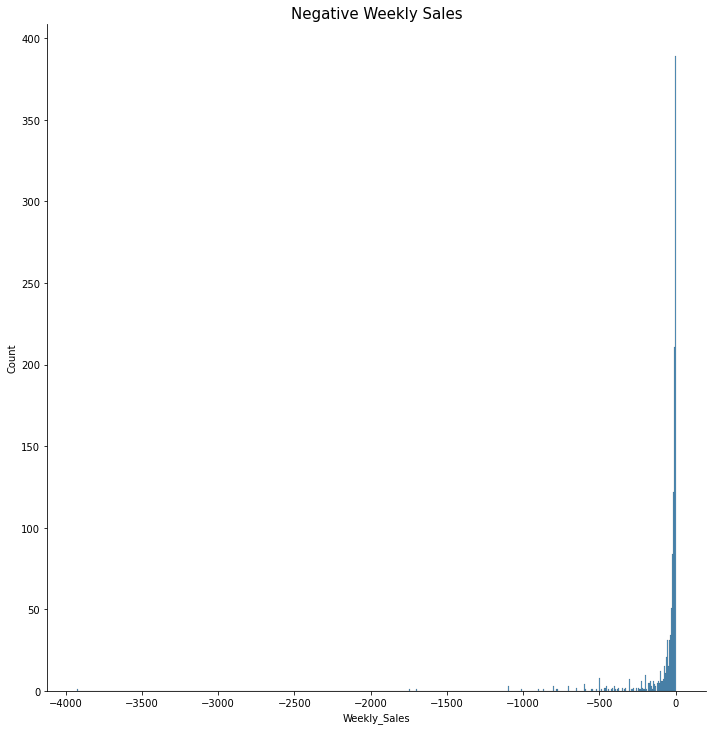

In [55]:
y = train["Weekly_Sales"][train.Weekly_Sales < 0]
sns.displot(y,height=10,aspect=1)
plt.title("Negative Weekly Sales", fontsize=15)
plt.show()

In [56]:
y.count()

1191

In [57]:
train=train[train['Weekly_Sales']>=0]

In [58]:
train.shape

(374247, 20)

In [59]:
train['IsHoliday'] = train['IsHoliday'].astype('int')

In [60]:
train['IsHoliday'].unique()

array([0, 1])

In [61]:
train.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032,0.0
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,766.93,-9.92,372.655556,371.05,290.954675,0.0
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,2512.14,110.56,876.629441,824.04,307.436056,0.0
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,214.471451,6.299,0,2010,2,5,11990.43,7414.43,9188.915105,9161.97,756.223236,0.0
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,29166.26,4791.74,8607.050490,7571.60,3874.176095,0.0


In [62]:
train.to_csv(r'C:\Users\anmol.f.kumar\OneDrive - Accenture\Desktop\Datasets\Walmart-Sales\CleanProcessed_Walmart_Dataset.csv')

# Data Visualizations

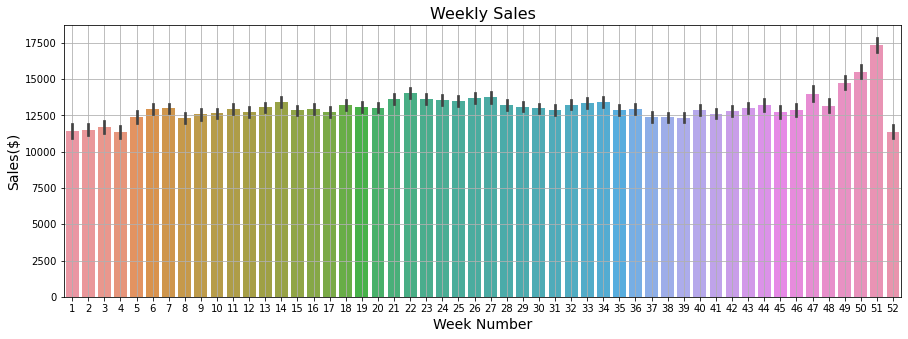

In [63]:
#Weekly Sales
plt.figure(figsize=(15,5))
sns.barplot(x='Week',y='Weekly_Sales',data=train)
plt.ylabel('Sales($)',fontsize=14)
plt.xlabel('Week Number',fontsize=14)
plt.title('Weekly Sales',fontsize=16)
plt.grid()

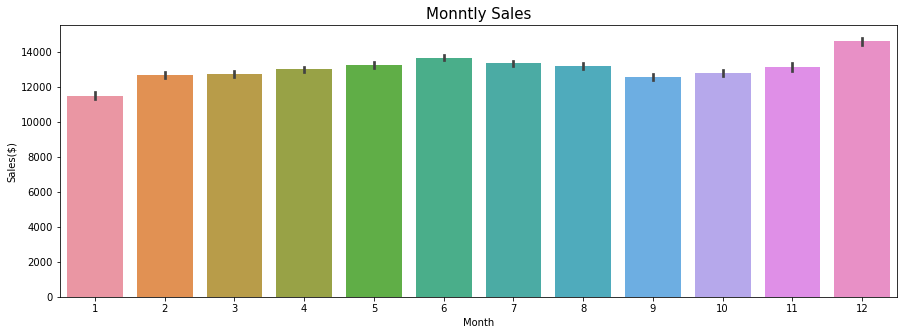

In [64]:
#Monthly Sales
plt.figure(figsize=(15,5))
sns.barplot(x='Month',y='Weekly_Sales',data=train)
plt.xlabel('Month',fontsize=10)
plt.ylabel('Sales($)',fontsize=10)
plt.title('Monntly Sales',fontsize=15)
plt.show()

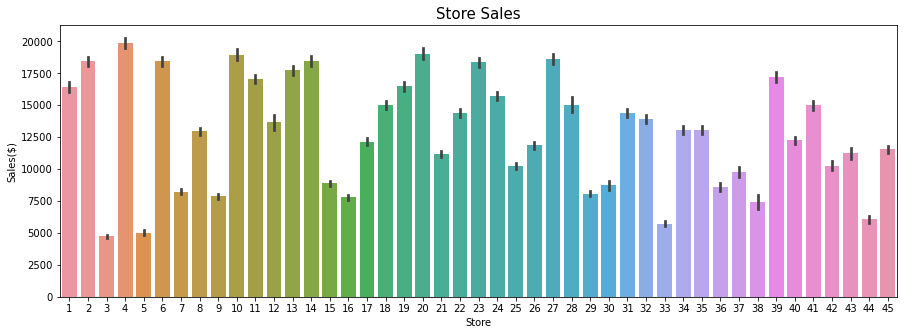

In [65]:
#Store Sales
plt.figure(figsize=(15,5))
sns.barplot(x='Store',y='Weekly_Sales',data=train)
plt.xlabel('Store',fontsize=10)
plt.ylabel('Sales($)',fontsize=10)
plt.title('Store Sales',fontsize=15)
plt.show()

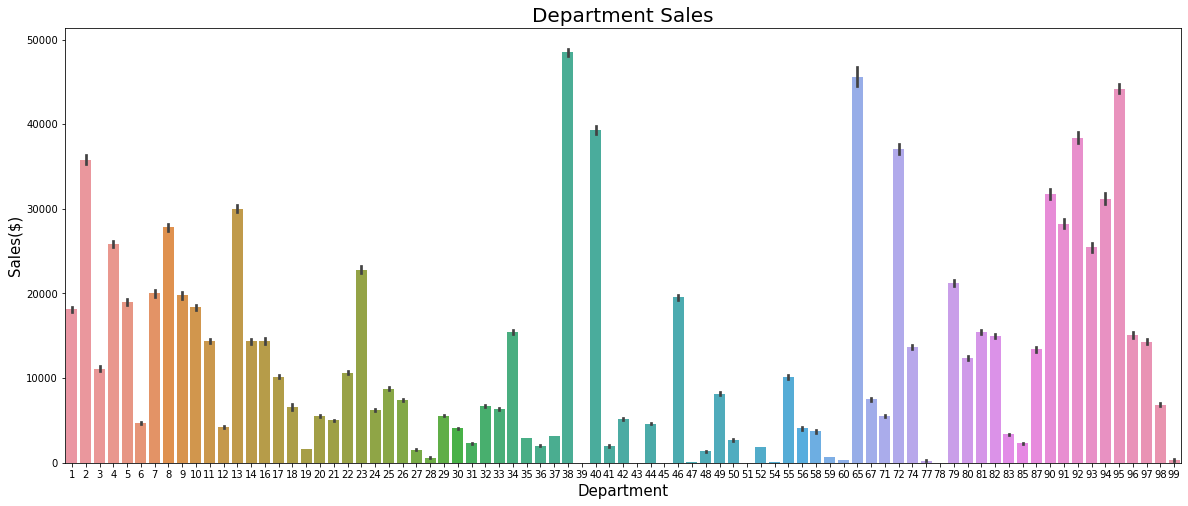

In [66]:
#Department Sales
plt.figure(figsize=(20,8))
sns.barplot(x='Dept',y='Weekly_Sales',data=train)
plt.xlabel('Department',fontsize=15)
plt.ylabel('Sales($)',fontsize=15)
plt.title('Department Sales',fontsize=20)
plt.show()

C:\Users\anmol.f.kumar\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


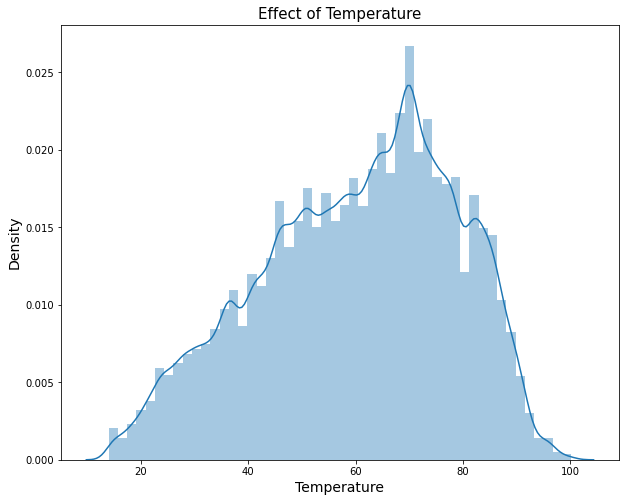

In [67]:
#Distribution of Temperature
plt.figure(figsize=(10,8))
sns.distplot(train['Temperature'])
plt.title('Effect of Temperature',fontsize=15)
plt.xlabel('Temperature',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.show()

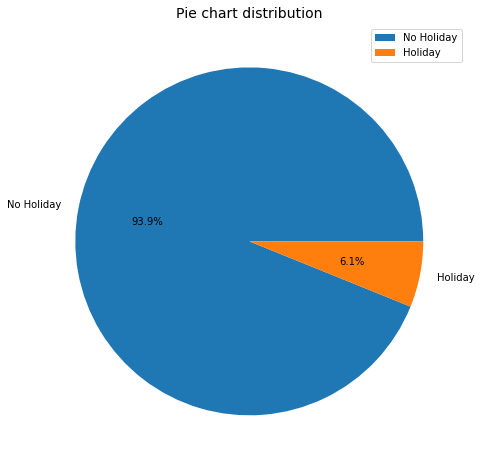

In [68]:
#Holiday Distribution
plt.figure(figsize=(8,8))
plt.pie(train['IsHoliday'].value_counts(),labels=['No Holiday','Holiday'],autopct='%0.1f%%')
plt.title("Pie chart distribution",fontsize=14)
plt.legend()
plt.show()

# One Hot Encoding

In [69]:
col_cat=['Store','Dept','Type']
train_cat=train[col_cat]

In [70]:
train_cat.tail()

,Store,Dept,Type
Date,,,
2012-10-26,2,26,A
2012-10-26,38,23,C
2012-10-26,27,6,A
2012-10-26,36,40,A
2012-10-26,45,98,B


In [71]:
train_cat=pd.get_dummies(train_cat,columns=col_cat)

In [72]:
train_cat.head()

,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2010-02-05,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [73]:
train_cat.shape

(374247, 129)

In [74]:
train.shape

(374247, 20)

In [75]:
train=pd.concat([train,train_cat],axis=1)

In [76]:
train.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,8.106,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,214.655459,6.415,...,0,0,0,0,1,0,0,0,1,0
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,214.655459,6.415,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,214.471451,6.299,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,214.655459,6.415,...,0,0,0,0,0,0,0,0,1,0


In [77]:
train=train.drop(col_cat,axis=1)

In [78]:
train=train.drop(['Date'],axis=1)

In [79]:
train.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,24924.50,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,668.48,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,...,0,0,0,0,1,0,0,0,1,0
2010-02-05,693.87,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,8654.60,155078,34.14,2.572,214.471451,6.299,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,11123.56,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0


In [80]:
train.shape

(374247, 145)

# Data Normalization

In [81]:
train.columns

Index(['Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'IsHoliday', 'Year', 'Month', 'Week',
       ...
       'Dept_93', 'Dept_94', 'Dept_95', 'Dept_96', 'Dept_97', 'Dept_98',
       'Dept_99', 'Type_A', 'Type_B', 'Type_C'],
      dtype='object', length=145)

In [82]:
col_norm=['Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'CPI','Unemployment',
          'Total_MarkDown','max','min','mean','median','std' ]

In [83]:
from sklearn.preprocessing import MinMaxScaler

In [84]:
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [85]:
train=normalization(train.copy(),col_norm)

In [86]:
train[['Total_MarkDown','max','min','mean','median','std']]

,Total_MarkDown,max,min,mean,median,std
Date,,,,,,
2010-02-05,0.000000,0.088635,0.253530,0.208157,0.173215,0.138276
2010-02-05,0.000000,0.001180,0.064648,0.004499,0.004767,0.004083
2010-02-05,0.000000,0.003866,0.066212,0.009135,0.008968,0.004314
2010-02-05,0.000000,0.018453,0.161046,0.085594,0.086290,0.010611
2010-02-05,0.000000,0.044887,0.126993,0.080242,0.071542,0.054362
...,...,...,...,...,...,...
2012-10-26,0.222942,0.030286,0.119050,0.087055,0.082590,0.039642
2012-10-26,0.011583,0.000446,0.064822,0.001419,0.001617,0.000478
2012-10-26,0.252667,0.063107,0.097548,0.072181,0.064375,0.072670


# Correlations

In [118]:
train.shape

(374247, 145)

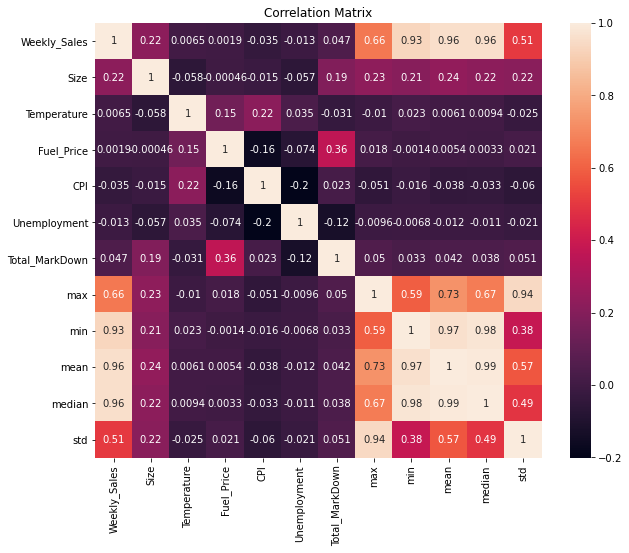

In [89]:
plt.figure(figsize=(10,8))
corr=train[col_norm].corr()
sns.heatmap(corr,vmax=1.0,annot=True)
plt.title("Correlation Matrix")
plt.show()

# Model

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [92]:
X=train.drop(['Weekly_Sales'],axis=1)
Y=train['Weekly_Sales']

In [93]:
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X,Y,test_size=0.2,random_state=50)

In [94]:
#Linear regression
lr=LinearRegression(normalize=False)
lr.fit(X_Train,Y_Train)

LinearRegression()

In [95]:
Y_Pred=lr.predict(X_Test)

In [98]:
lr_acc = lr.score(X_Test,Y_Test)*100
print("Linear Regressor Accuracy - ",lr_acc)

Linear Regressor Accuracy -  92.3195363429348


In [99]:
from sklearn import metrics

In [100]:
print("MAE" , metrics.mean_absolute_error(Y_Test, Y_Pred))
print("MSE" , metrics.mean_squared_error(Y_Test, Y_Pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(Y_Test, Y_Pred)))
print("R2" , metrics.explained_variance_score(Y_Test, Y_Pred))

MAE 0.03021047499335541
MSE 0.0034676527560645446
RMSE 0.0588867791279549
R2 0.9231953776069595


In [104]:
lr_df = pd.DataFrame({'Actual': Y_Test, 'Predicted': Y_Pred})
lr_df.sort_values('Date',ascending=True)

,Actual,Predicted
Date,,
2010-02-05,0.022277,0.017479
2010-02-05,0.149009,0.129274
2010-02-05,0.381492,0.346467
2010-02-05,0.190663,0.143189
2010-02-05,0.361816,0.276115
...,...,...
2012-10-26,0.123138,0.144201
2012-10-26,0.030685,0.020119
2012-10-26,0.019483,0.007110


# Random Forest Regressor

In [111]:
from sklearn.ensemble import RandomForestRegressor
#train.to_csv(r'C:\Users\anmol.f.kumar\OneDrive - Accenture\Desktop\Datasets\Walmart-Sales\Final_Dataset.csv')

In [121]:
rf=RandomForestRegressor(max_depth=8)
rf.fit(X_Train,Y_Train)

RandomForestRegressor(max_depth=8)

In [122]:
Y_Pred = rf.predict(X_Test)
rf_acc = rf.score(X_Test,Y_Test)*100
print("Random Forest Regressor Accuracy - ",rf_acc)

Random Forest Regressor Accuracy -  94.25021425714581


In [123]:
print("MAE" , metrics.mean_absolute_error(Y_Test, Y_Pred))
print("MSE" , metrics.mean_squared_error(Y_Test, Y_Pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(Y_Test, Y_Pred)))
print("R2" , metrics.explained_variance_score(Y_Test, Y_Pred))

MAE 0.02640488135433397
MSE 0.002595970929391464
RMSE 0.05095067153032886
R2 0.9425023538111659
